In [1]:
from stochastic_proc.midprice import BrownianMidprice
from stochastic_proc.arrivals import PoissonArrivals, HawkesArrivals
from stochastic_proc.dynamics import LimitOrderDynamics
from envs.trading import TradingEnv
from agents.avellaneda_stoikov import AvellanedaStoikovAgent
from rewards.RewardFunctions import PnLReward, InventoryQuadraticPenalty, SpreadRegularizer, SumReward
from utils.plot_single import run_and_log, plot_single_episode
from utils.plot_batch import simulate_batch, plot_batch
from utils.plot_lite import plot_trajectory, generate_results_table_and_hist
from utils.calibration import hawkes_params
from agents.glft import GLFTAgent
from utils.calibration import hawkes_params, glft_half_spreads

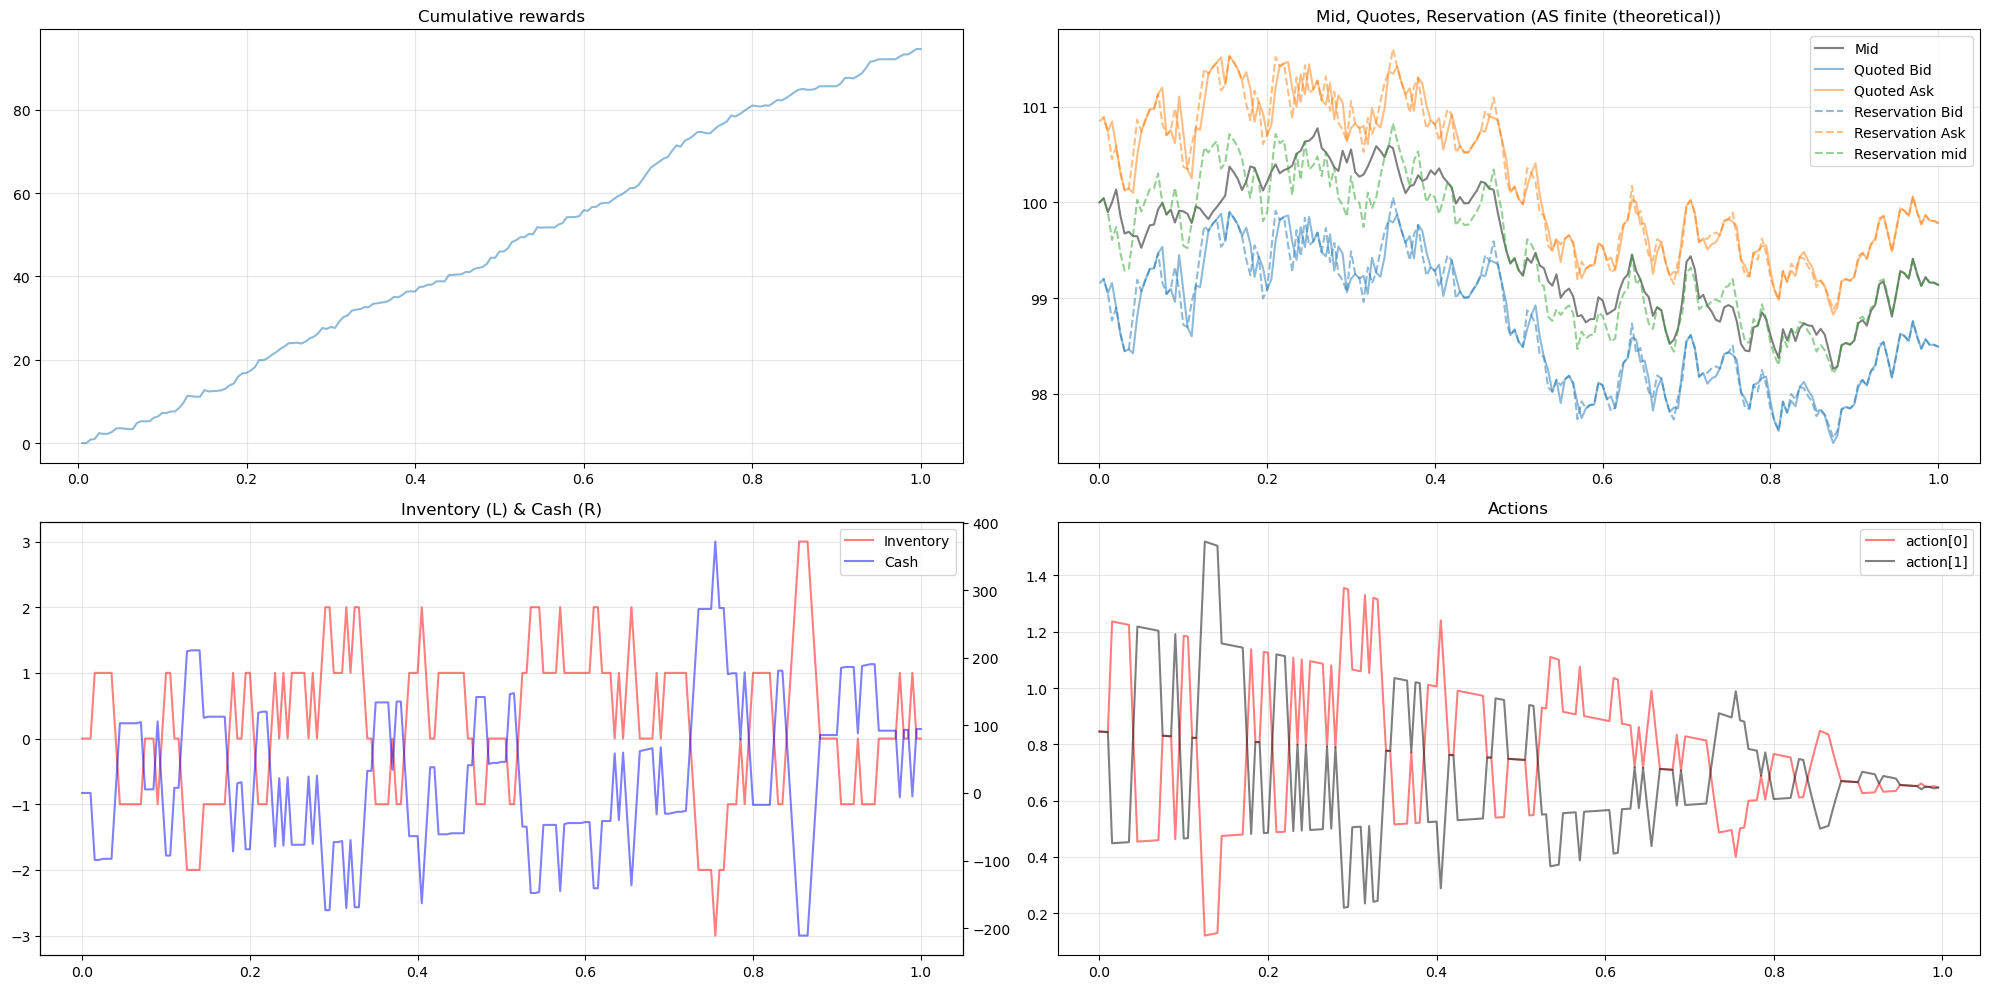

          Mean spread   Mean PnL   Std PnL Mean terminal inventory  \
Inventory    1.492085  93.267929  7.670089               -0.130859   

          Std terminal inventory  
Inventory                2.97917  


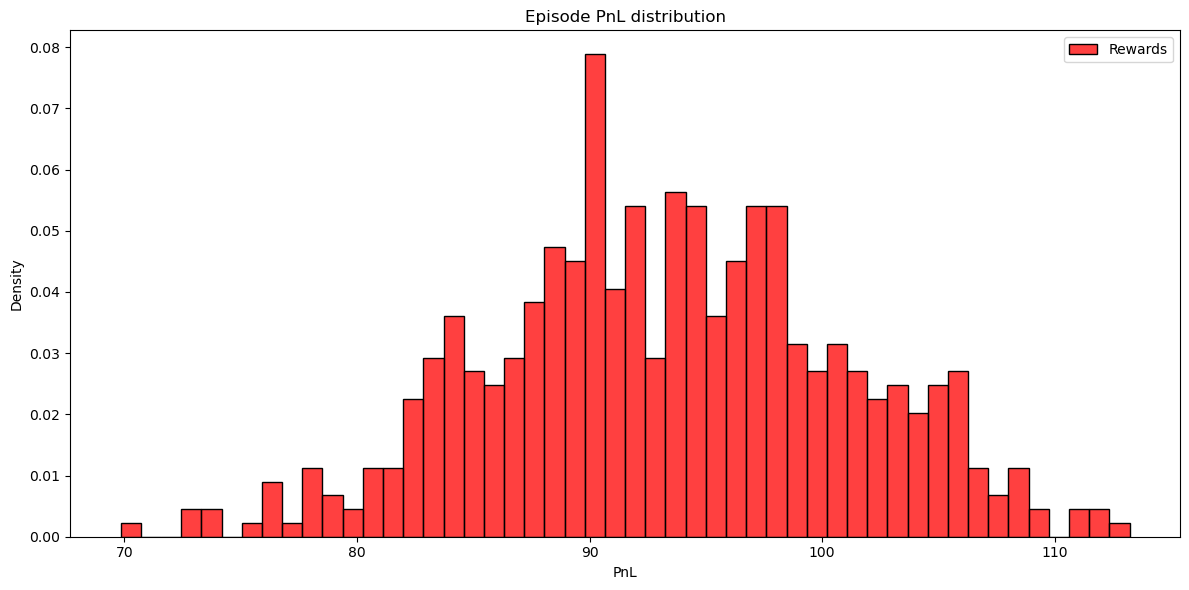

In [4]:
SEED, T, M, s0, sigma, A, k_fill, N = 42, 1.0, 200, 100.0, 2.0, 140.0, 1.5, 1
dt = T / M
mid = BrownianMidprice(s0, sigma, num_traj=N, dt=dt, T=T, seed=SEED)
arr = PoissonArrivals(A, A, num_traj=N, dt=dt, T=T, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)

# Single-trajectory plotting (RL-style)
env = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=False)
agent = AvellanedaStoikovAgent(env, gamma=0.1)
plot_trajectory(env, agent, show_reservation=T)

# Batch stats & PnL hist (vectorized episode)
mid = BrownianMidprice(s0, sigma, num_traj=512, dt=dt, T=T, seed=SEED)
arr = PoissonArrivals(A, A, num_traj=512, dt=dt, T=T, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)
env_vec = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=True)
agent = AvellanedaStoikovAgent(env_vec, gamma=0.1)
results, fig, totals = generate_results_table_and_hist(env_vec, agent)
print(results)

Infinite horizon

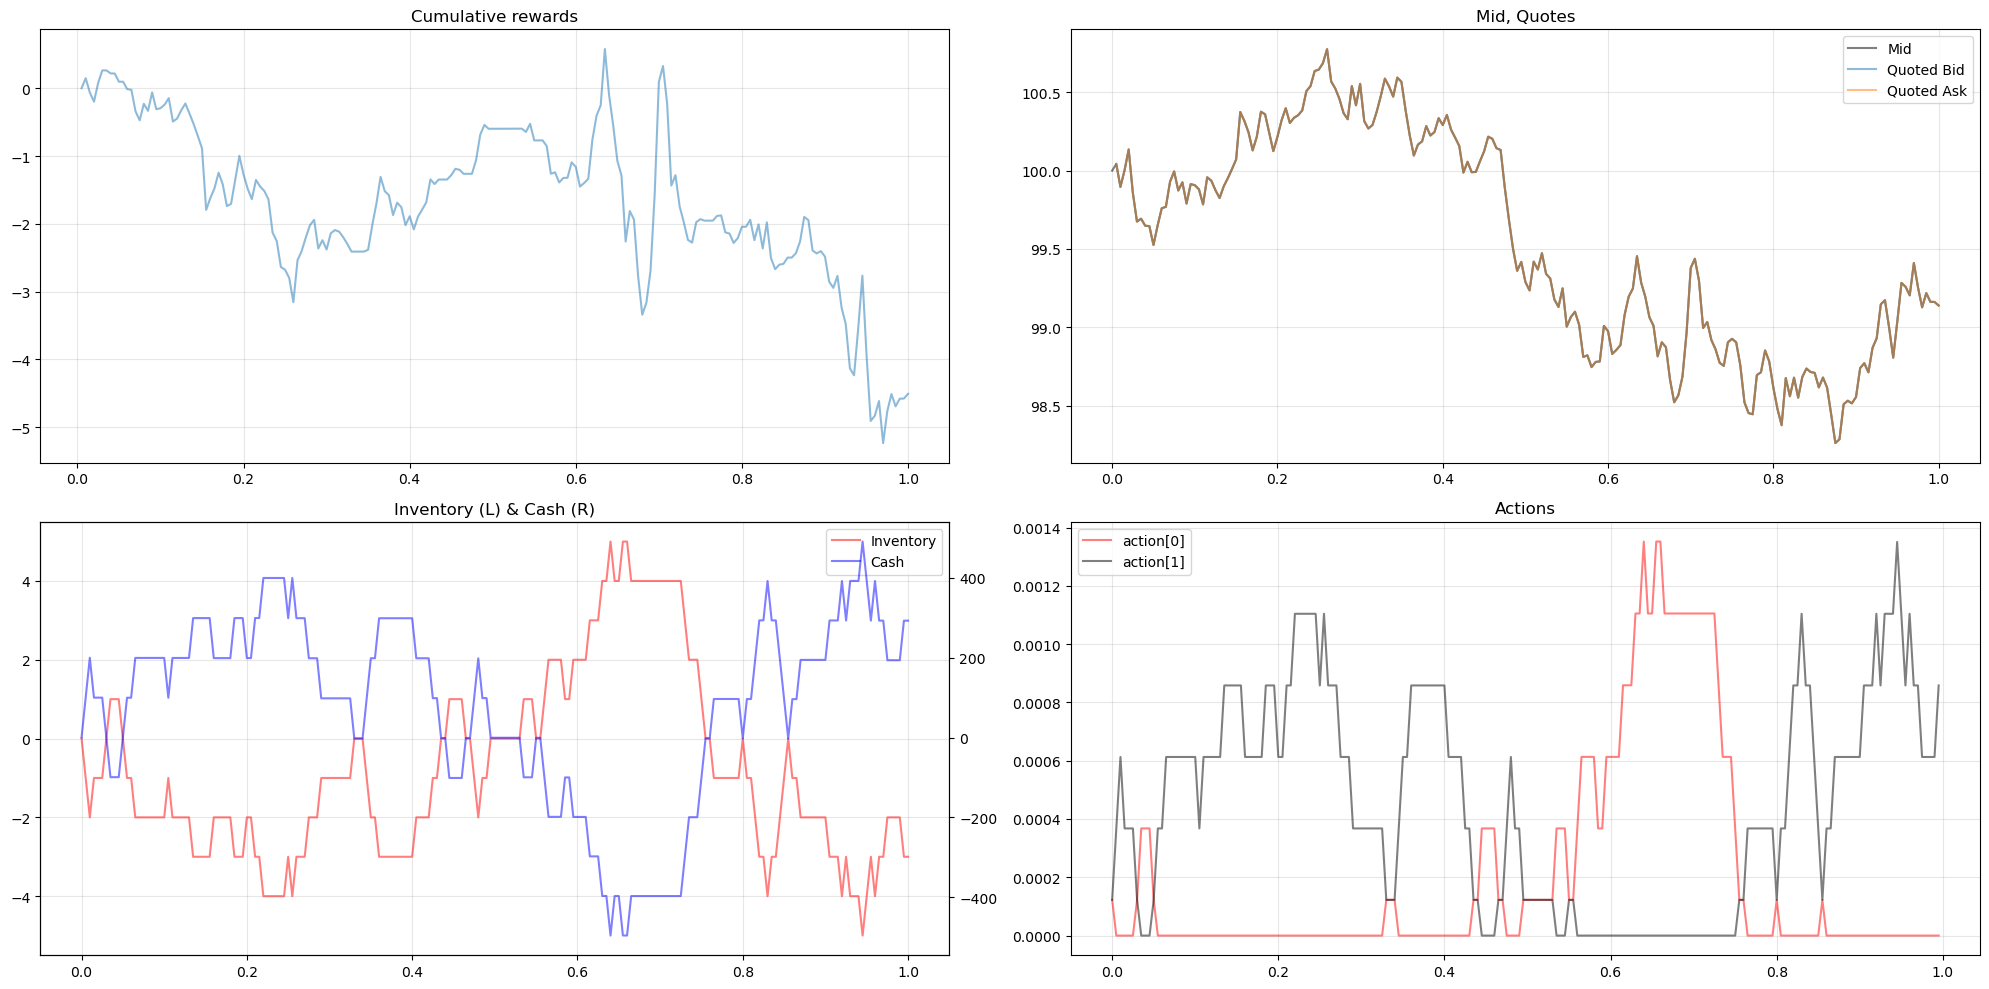

          Mean spread  Mean PnL    Std PnL Mean terminal inventory  \
Inventory    0.001386  0.168985  13.529772                0.050781   

          Std terminal inventory  
Inventory               9.781068  


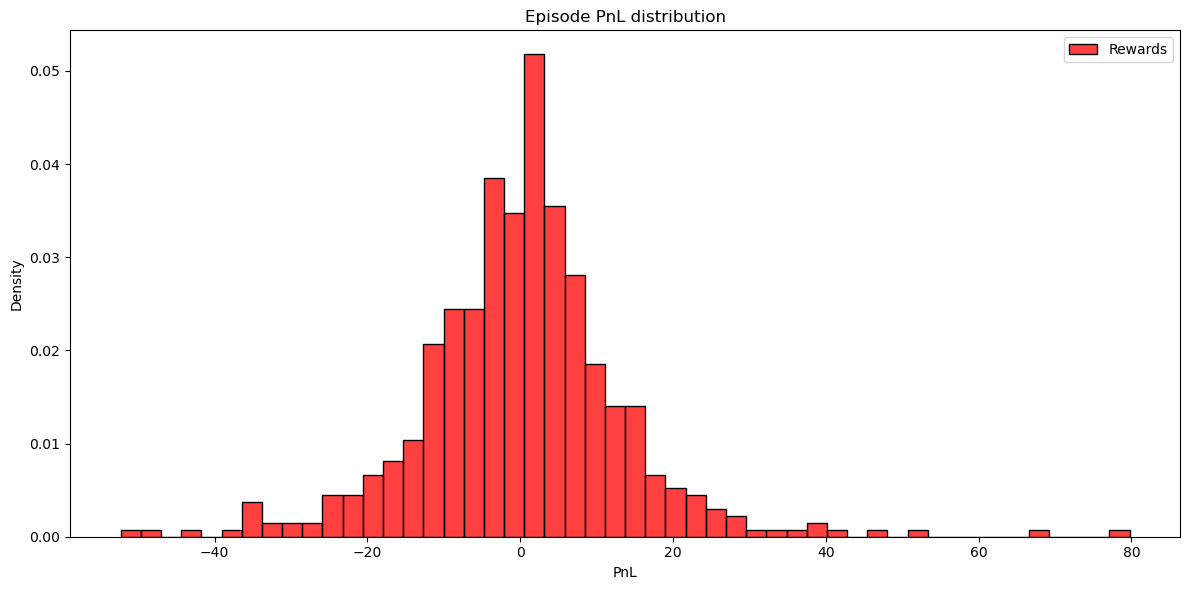

In [5]:
SEED, T, M, s0, sigma, A, k_fill, N = 42, 1.0, 200, 100.0, 2.0, 140.0, 1.5, 1
dt = T / M
mid = BrownianMidprice(s0, sigma, num_traj=N, dt=dt, T=T, seed=SEED)
arr = PoissonArrivals(A, A, num_traj=N, dt=dt, T=T, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)

# Single-trajectory plotting (RL-style)
env = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=False)
agent_inf = AvellanedaStoikovAgent(env, gamma=0.8, mode="infinite", q_max=100)
plot_trajectory(env, agent_inf, show_reservation=False)

# Batch stats & PnL hist (vectorized episode)
mid = BrownianMidprice(s0, sigma, num_traj=512, dt=dt, T=T, seed=SEED)
arr = PoissonArrivals(A, A, num_traj=512, dt=dt, T=T, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)
env_vec = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=True)
agent_inf = AvellanedaStoikovAgent(env_vec, gamma=0.8, mode="infinite", q_max=100)
results, fig, totals = generate_results_table_and_hist(env_vec, agent_inf)
print(results)

Hawkes distribution

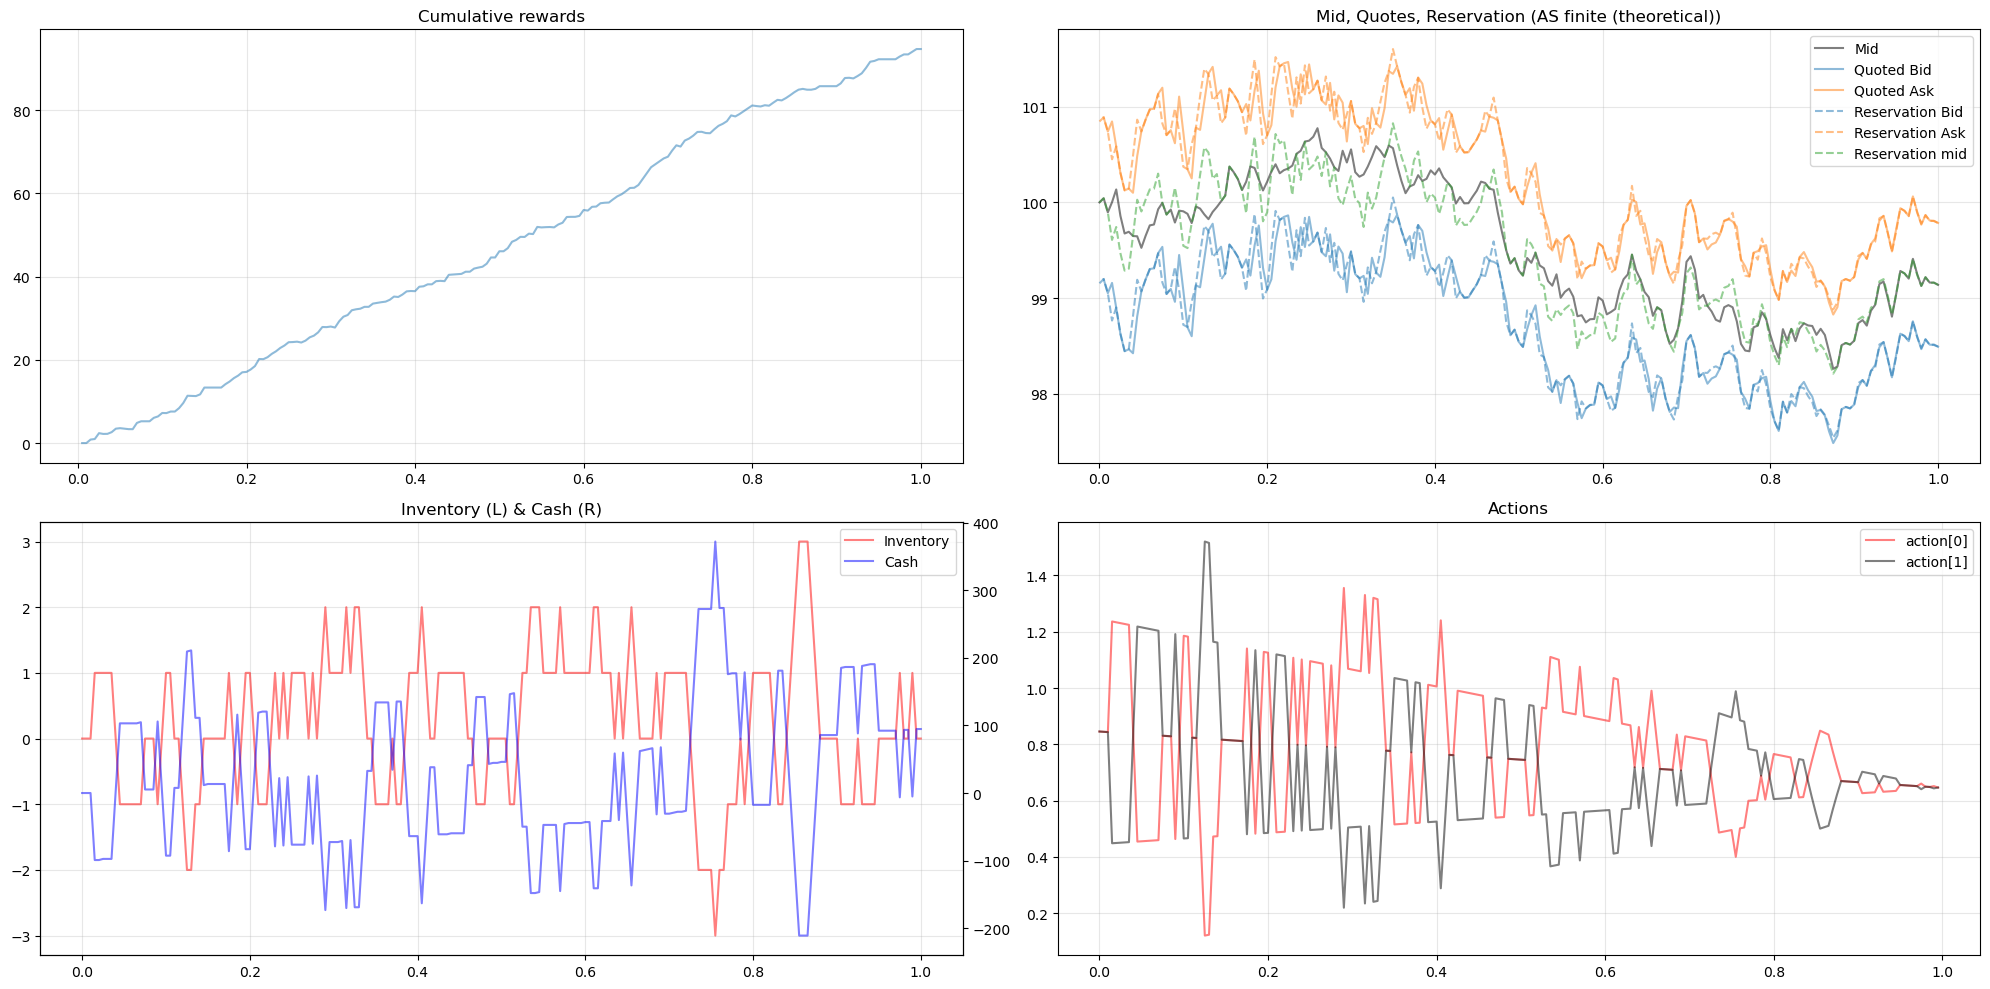

          Mean spread   Mean PnL   Std PnL Mean terminal inventory  \
Inventory    1.491877  92.403168  7.606597               -0.130859   

          Std terminal inventory  
Inventory                2.97917  


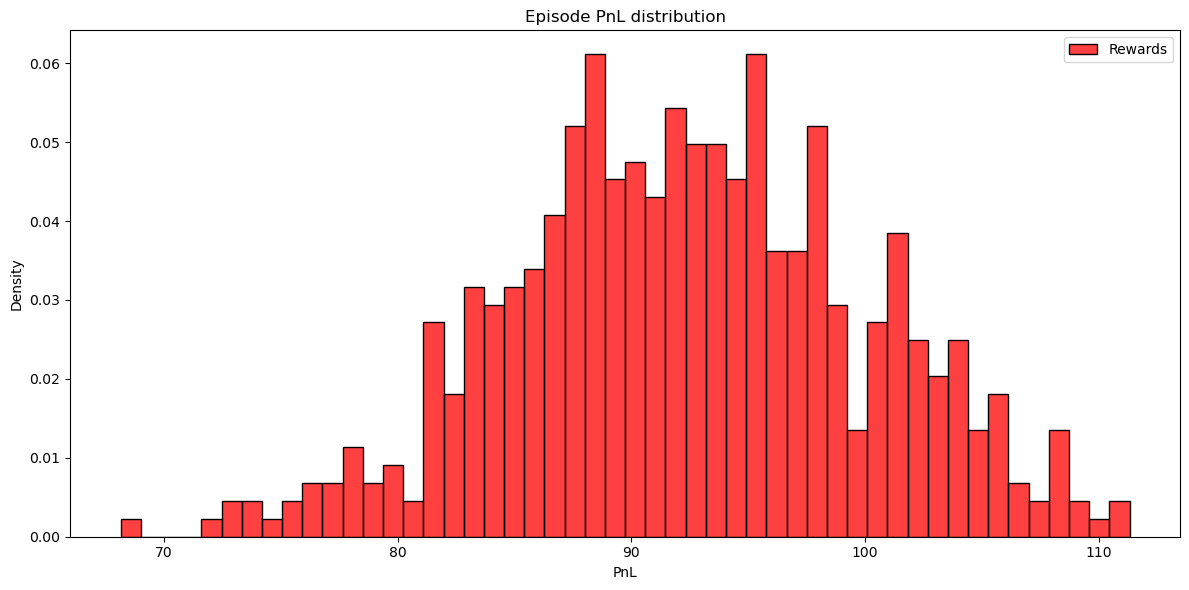

In [6]:
SEED, T, M, s0, sigma, A, k_fill, N = 42, 1.0, 200, 100.0, 2.0, 140.0, 1.5, 1
dt = T / M
mu, kappa, jump = hawkes_params(dt=dt, p_target=0.30, eta=0.6, memory_steps=10)

mid = BrownianMidprice(s0, sigma, num_traj=N, dt=dt, T=T, seed=SEED)
arr = HawkesArrivals(A, A, num_traj=N, dt=dt, T=T, seed=SEED, kappa=kappa, jump=jump)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)

# Single-trajectory plotting (RL-style)
env = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=False)
agent = AvellanedaStoikovAgent(env, gamma=0.1)
plot_trajectory(env, agent, show_reservation=True)

# Batch stats & PnL hist (vectorized episode)
mid = BrownianMidprice(s0, sigma, num_traj=512, dt=dt, T=T, seed=SEED)
arr = HawkesArrivals(A, A, num_traj=N, dt=dt, T=T, kappa=kappa, jump=jump, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)
env_vec = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=True)
agent = AvellanedaStoikovAgent(env_vec, gamma=0.1)
results, fig, totals = generate_results_table_and_hist(env_vec, agent)
print(results)

GLFT

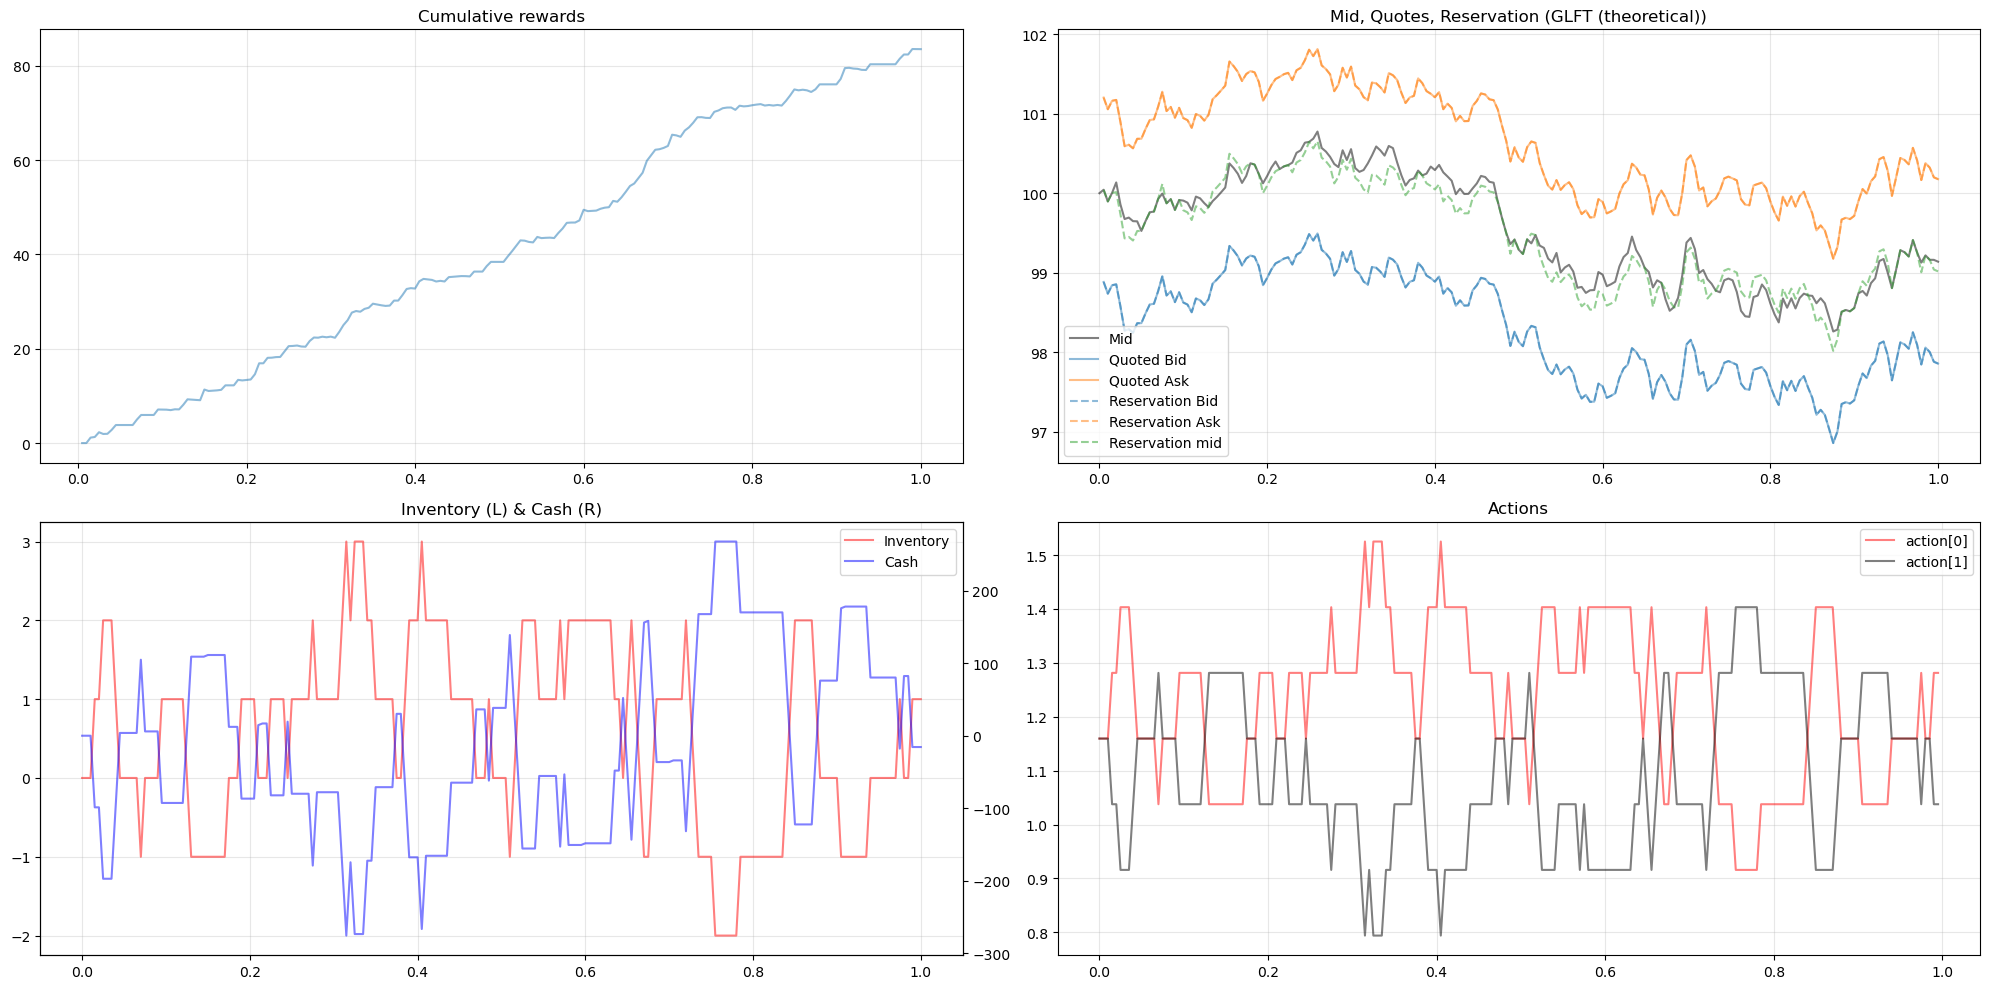

          Mean spread   Mean PnL   Std PnL Mean terminal inventory  \
Inventory    2.319069  81.018768  9.157394               -0.011719   

          Std terminal inventory  
Inventory               1.490811  


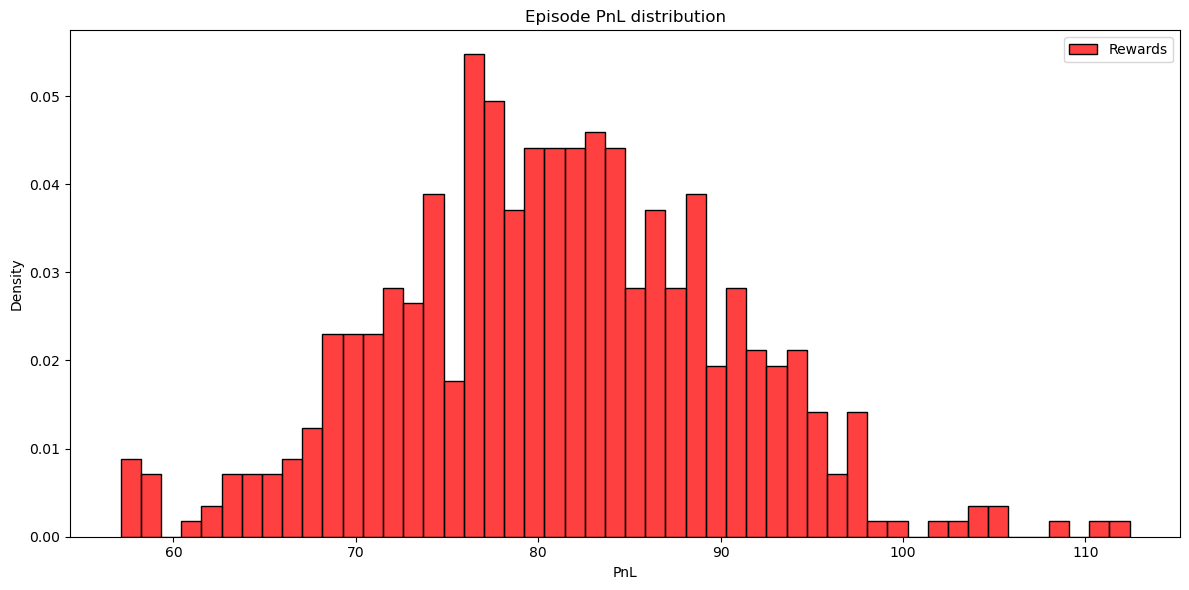

In [12]:
SEED, T, M, s0, sigma, A, k_fill, N, k = 42, 1.0, 200, 100.0, 2.0, 140.0, 1.5, 1, 0.5
dt = T / M
mid = BrownianMidprice(s0, sigma, num_traj=N, dt=dt, T=T, seed=SEED)
arr = PoissonArrivals(A, A, num_traj=N, dt=dt, T=T, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)

# Single-trajectory plotting (RL-style)
env = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=False)
agent = GLFTAgent(env, gamma=0.1, A=A, k=k, xi=1.0, tick=1.0)
plot_trajectory(env, agent, show_reservation=True)

# Batch stats & PnL hist (vectorized episode)
mid = BrownianMidprice(s0, sigma, num_traj=512, dt=dt, T=T, seed=SEED)
arr = PoissonArrivals(A, A, num_traj=512, dt=dt, T=T, seed=SEED)
dyn = LimitOrderDynamics(mid, arr, fill_k=k_fill, max_depth=20.0)
env_vec = TradingEnv(dynamics=dyn, T=T, M=M, seed=SEED, return_vectorized=True)
GLFT_agent = GLFTAgent(env, gamma=0.1, A=A, k=k, xi=1.0, tick=1.0)
results, fig, totals = generate_results_table_and_hist(env_vec, GLFT_agent)
print(results)